In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
dataset_train = pd.read_csv(filepath_or_buffer='regression_train.csv',header=None,names=['Input','Output'])
dataset_test = pd.read_csv(filepath_or_buffer='regression_test.csv',header=None,names=['Input','Output'])

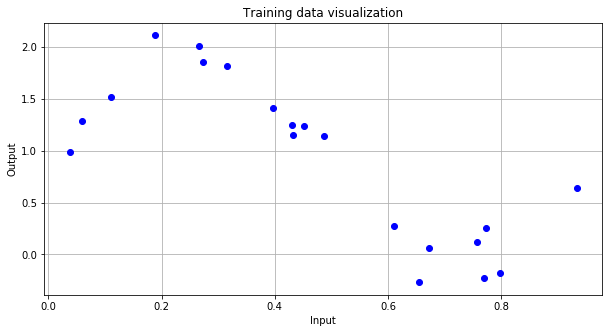

In [3]:
X_train = dataset_train['Input'].values.reshape((dataset_train.shape[0],1))
y_train = dataset_train['Output'].values.reshape((dataset_train.shape[0],1))

X_test = dataset_test['Input'].values.reshape((dataset_test.shape[0],1))
y_test = dataset_test['Output'].values.reshape((dataset_test.shape[0],1))

plt.plot(X_train,y_train,'b.',markersize=12)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data visualization')
plt.grid(b=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [4]:
def linear_regression(x,y):
    xnew = np.concatenate([np.ones((x.shape[0],1)),x],axis=1)
    wopt = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(xnew),xnew)),np.transpose(xnew)),y)
    Jloss = np.square(LA.norm((np.matmul(xnew,wopt)-y)))
    return wopt, Jloss

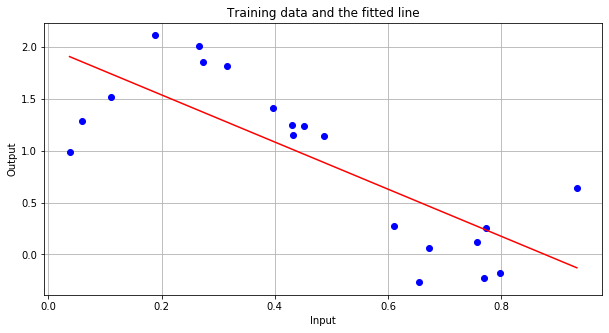

In [5]:
wopt, Jloss = linear_regression(X_train,y_train)
X_l1 = np.linspace(min(X_train),max(X_train),100)
line1 = np.multiply(wopt[1],X_l1) + wopt[0]

plt.plot(X_train,y_train,'b.',markersize=12)
plt.plot(X_l1,line1,'r')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data and the fitted line')
plt.grid(b=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [6]:
print(wopt)
print(Jloss)

[[ 1.99196163]
 [-2.27048372]]
4.603634906406957


In [7]:
def gradient_descent(x,y,max_iter,lr,tol):
    xnew = np.concatenate([np.ones((x.shape[0],1)),x],axis=1)
    w = np.zeros((xnew.shape[1],1))
    Jlossp= np.square(LA.norm((np.matmul(xnew,w)-y)))
    Jloss = [Jlossp]
    iter_num = [0]
    wn = [w]
    for i in range(max_iter):
        w = w - np.multiply(lr,np.matmul(np.transpose(xnew),(np.matmul(xnew,w)-y)))
        Jlossn= np.square(LA.norm((np.matmul(xnew,w)-y)))
        i_n = i+1;
        wn.append(w)
        Jloss.append(Jlossn)
        iter_num.append(i_n)
        if abs(Jlossp - Jlossn)<tol :
            break
        Jlossp = Jlossn
            
    wn_arr = np.concatenate(wn,axis=1)
    Jloss_arr = np.array(Jloss)
    iter_arr = np.array(iter_num)
    
    plt.subplot(3,1,1)
    plt.plot(iter_arr,Jloss_arr,'r')
    plt.xlabel('Iteration Number')
    plt.ylabel('J')
    plt.title('Loss function for learning rate of {0}'.format(lr))
    plt.grid(b=True)
    
    plt.subplot(3,1,2)
    plt.plot(iter_arr,wn_arr[0,:],'r')
    plt.xlabel('Iteration Number')
    plt.ylabel('w0')
    plt.title('w0')
    plt.grid(b=True)
    
    plt.subplot(3,1,3)
    plt.plot(iter_arr,wn_arr[1,:],'r')
    plt.xlabel('Iteration Number')
    plt.ylabel('w1')
    plt.title('w1')
    plt.grid(b=True)
    
    fig = plt.gcf()
    fig.set_size_inches(12, 20)
    plt.show()
    
    return wn_arr, Jloss_arr, iter_arr
    

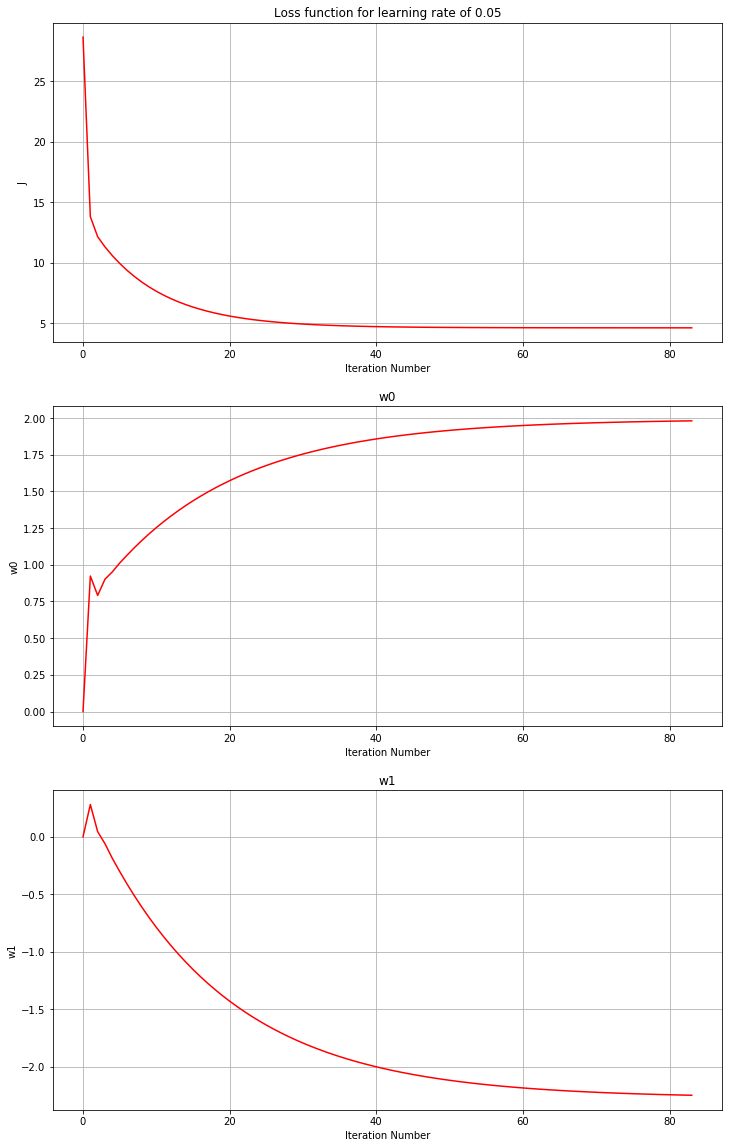

Learning rate = 0.05, Final loss (J(w)) = 4.6044056136703855 and converges at iteration number = 83


In [8]:
lr1 = 0.05
tol = 0.0001
max_iter = 10000
wn1, Jlossn1, iter_numn1 = gradient_descent(X_train,y_train,max_iter,lr1,tol)
print('Learning rate = {0}, Final loss (J(w)) = {1} and converges at iteration number = {2}'.format(lr1,Jlossn1[-1],iter_numn1[-1]))

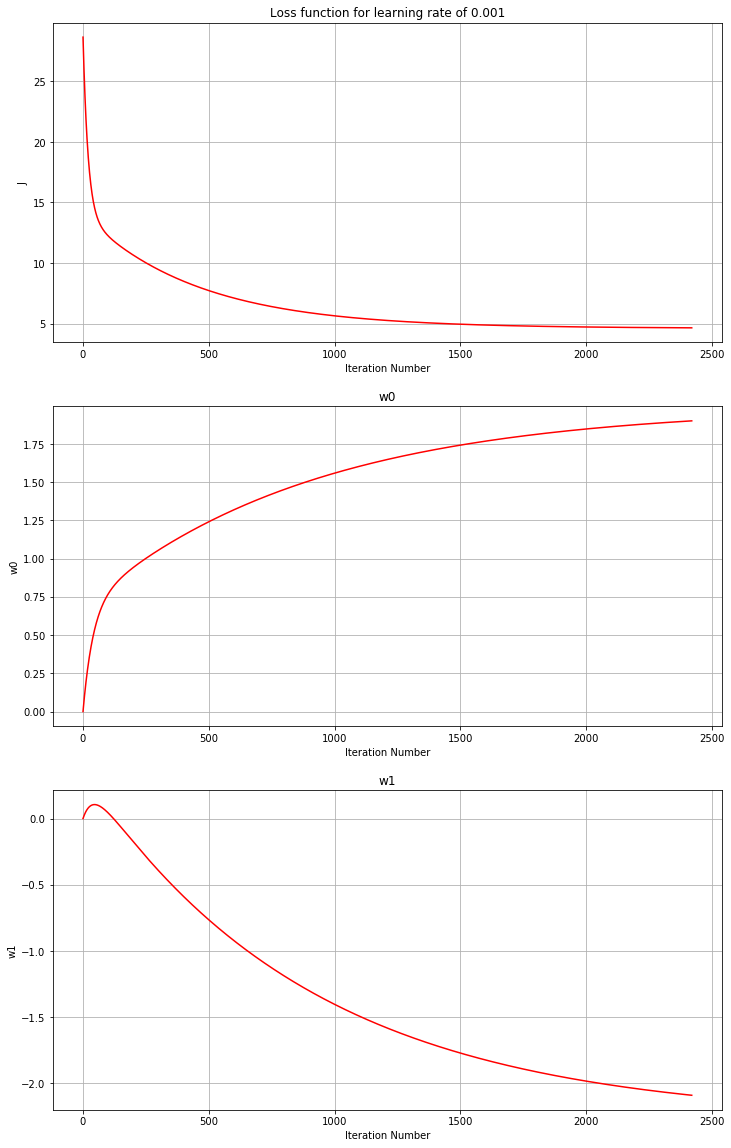

Learning rate = 0.001, Final loss (J(w)) = 4.648852786068523 and converges at iteration number = 2420


In [9]:
lr2 = 0.001
wn2, Jlossn2, iter_numn2 = gradient_descent(X_train,y_train,max_iter,lr2,tol)
print('Learning rate = {0}, Final loss (J(w)) = {1} and converges at iteration number = {2}'.format(lr2,Jlossn2[-1],iter_numn2[-1]))

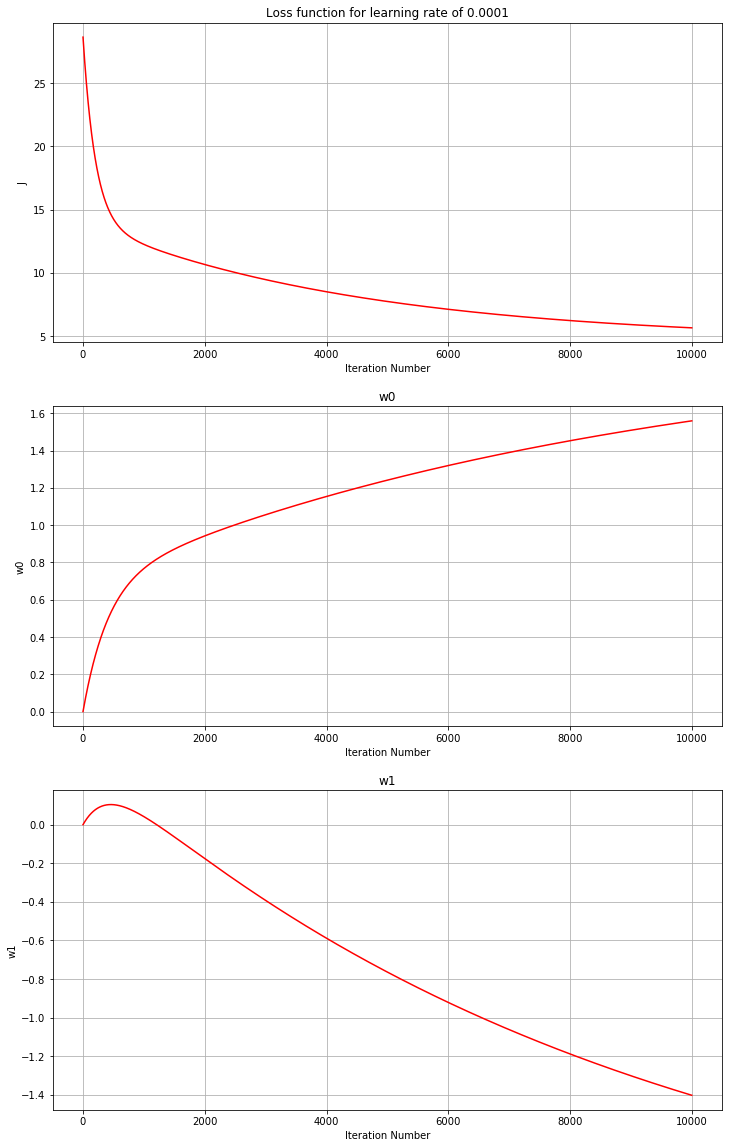

Learning rate = 0.0001, Final loss (J(w)) = 5.640772178144739 and converges at iteration number = 10000


In [10]:
lr3 = 0.0001
wn3, Jlossn3, iter_numn3 = gradient_descent(X_train,y_train,max_iter,lr3,tol)
print('Learning rate = {0}, Final loss (J(w)) = {1} and converges at iteration number = {2}'.format(lr3,Jlossn3[-1],iter_numn3[-1]))

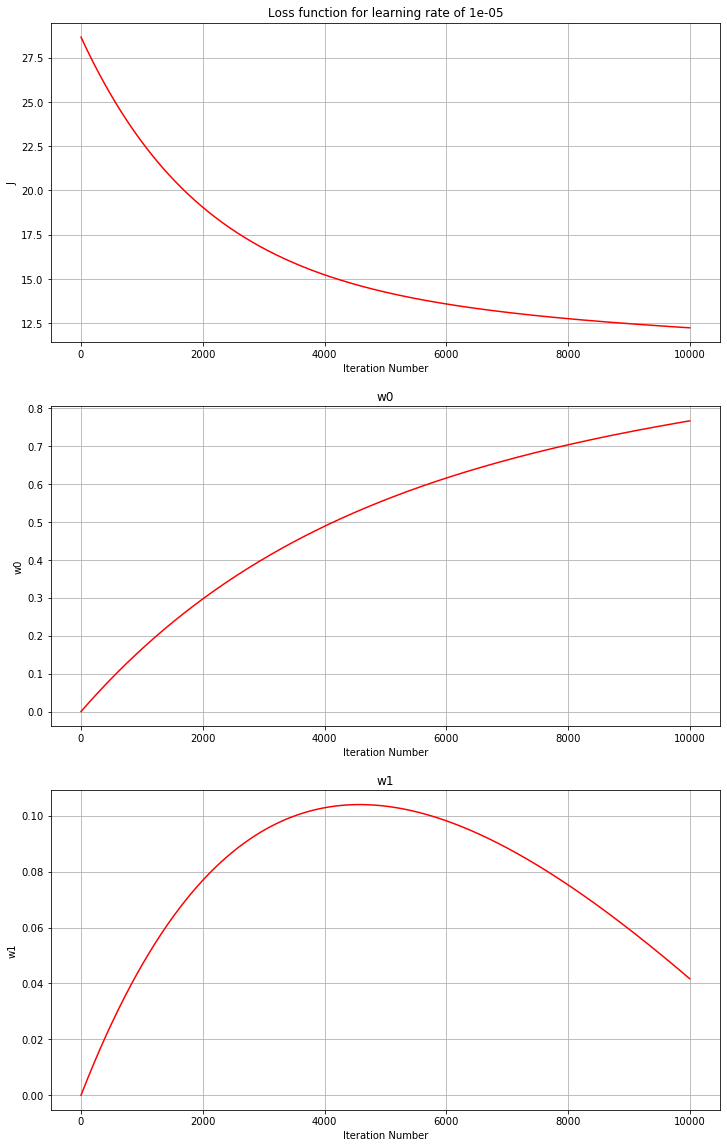

Learning rate = 1e-05, Final loss (J(w)) = 12.249367268440261 and converges at iteration number = 10000


In [11]:
lr4 = 0.00001
wn4, Jlossn4, iter_numn4 = gradient_descent(X_train,y_train,max_iter,lr4,tol)
print('Learning rate = {0}, Final loss (J(w)) = {1} and converges at iteration number = {2}'.format(lr4,Jlossn4[-1],iter_numn4[-1]))

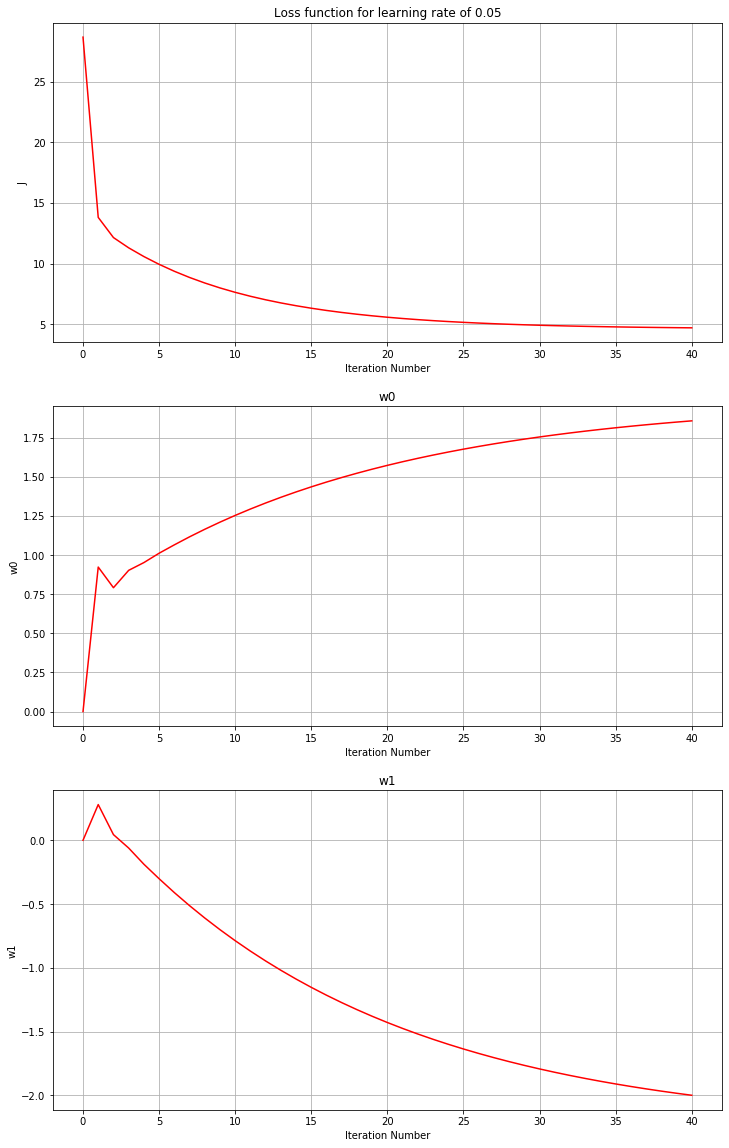

Learning rate = 0.05, Final loss (J(w)) = 4.7045286931001815 and converges at iteration number = 40


In [12]:
wn1n, Jlossn1n, iter_numn1n = gradient_descent(X_train,y_train,40,lr1,tol)
print('Learning rate = {0}, Final loss (J(w)) = {1} and converges at iteration number = {2}'.format(lr1,Jlossn1n[-1],iter_numn1n[-1]))

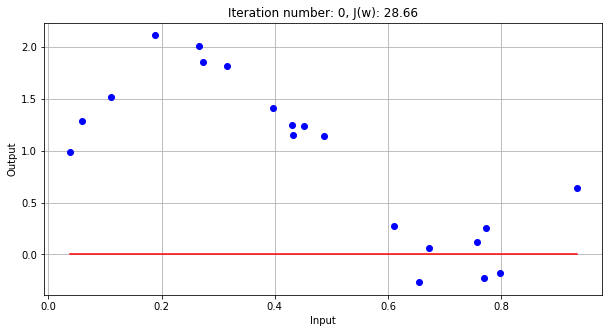

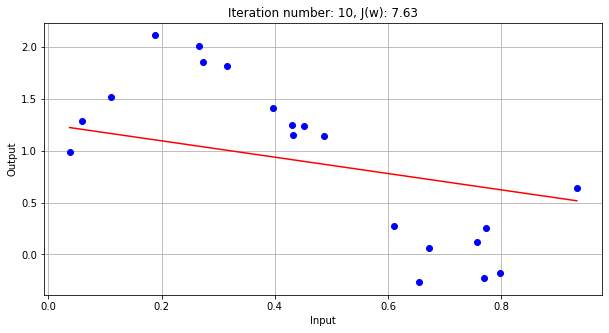

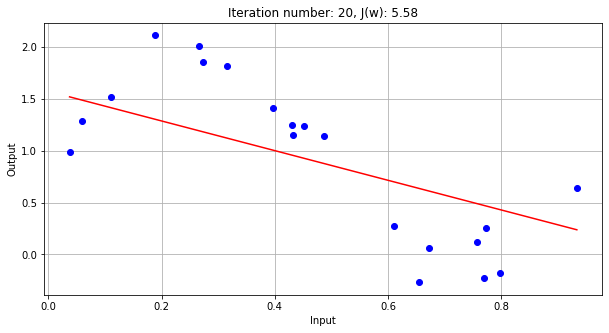

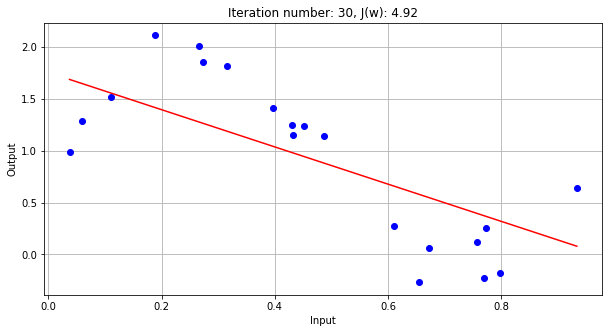

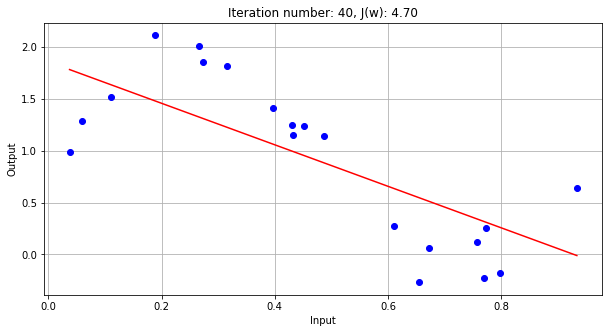

In [13]:
iter_visualization = [0,10,20,30,40]

for it in iter_visualization:
    X_l1 = np.linspace(min(X_train),max(X_train),100)
    line1 = np.multiply(wn1n[1,it],X_l1) + wn1n[0,it]
    
    plt.plot(X_train,y_train,'b.',markersize=12)
    plt.plot(X_l1,line1,'r')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Iteration number: {0}, J(w): {1:.2f}'.format(it,Jlossn1n[it]))
    plt.grid(b=True)
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.show()


In [14]:
def polynomial_regression(xtrain,ytrain,xtest,ytest,m):
    xmtrain_arr = [np.ones((xtrain.shape[0],1))]
    for mp in range(m):
        xmtrain_arr.append(xtrain**(mp+1))
    xmtrain = np.concatenate(xmtrain_arr,axis=1)
    
    xmtest_arr = [np.ones((xtest.shape[0],1))]
    for mp in range(m):
        xmtest_arr.append(xtest**(mp+1))
    xmtest = np.concatenate(xmtest_arr,axis=1)
    
    wopt = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(xmtrain),xmtrain)),np.transpose(xmtrain)),ytrain)
    Jlosstrain = np.square(LA.norm((np.matmul(xmtrain,wopt)-ytrain)))
    Ntrain = xtrain.shape[0]
    rmsetrain = np.sqrt(Jlosstrain/Ntrain)
    Jlosstest = np.square(LA.norm((np.matmul(xmtest,wopt)-ytest)))
    Ntest = xtest.shape[0]
    rmsetest = np.sqrt(Jlosstest/Ntest)
    
    xltrain = np.linspace(min(xtrain),max(xtrain),100)
    xmltrain_arr = [np.ones((xltrain.shape[0],1))]
    for mp in range(m):
        xmltrain_arr.append(xltrain**(mp+1))
    xmltrain = np.concatenate(xmltrain_arr,axis=1)
    linetrain = np.matmul(xmltrain,wopt)
    
    xltest = np.linspace(min(xtest),max(xtest),100)
    xmltest_arr = [np.ones((xltest.shape[0],1))]
    for mp in range(m):
        xmltest_arr.append(xltest**(mp+1))
    xmltest = np.concatenate(xmltest_arr,axis=1)
    linetest = np.matmul(xmltest,wopt)
    
    plt.subplot(2,1,1)
    plt.plot(xtrain,ytrain,'b.',markersize=12)
    plt.plot(xltrain,linetrain,'r')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Training data: Polynomial degree = {0} , RMSE = {1:.4f}'.format(m,rmsetrain))
    plt.grid(b=True)
    
    plt.subplot(2,1,2)
    plt.plot(xtest,ytest,'b.',markersize=12)
    plt.plot(xltest,linetest,'r')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Test data: Polynomial degree = {0} , RMSE = {1:.4f}'.format(m,rmsetest))
    plt.grid(b=True)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 15)
    plt.show()
    
    return wopt, Jlosstrain, Jlosstest, rmsetrain, rmsetest

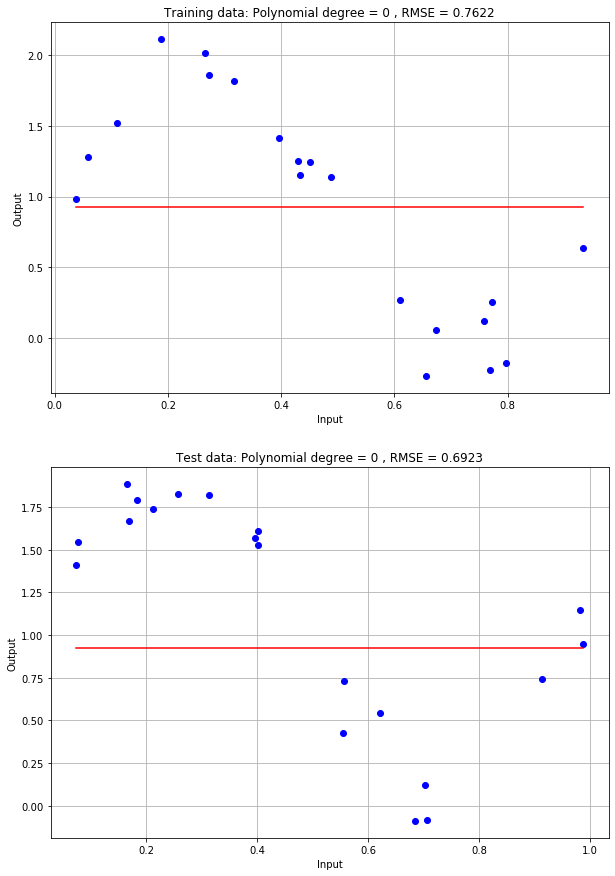

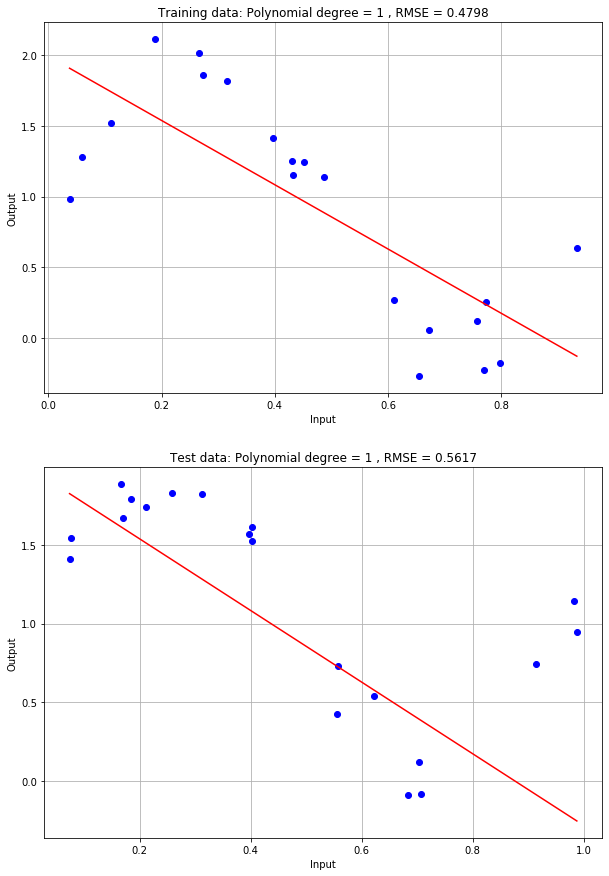

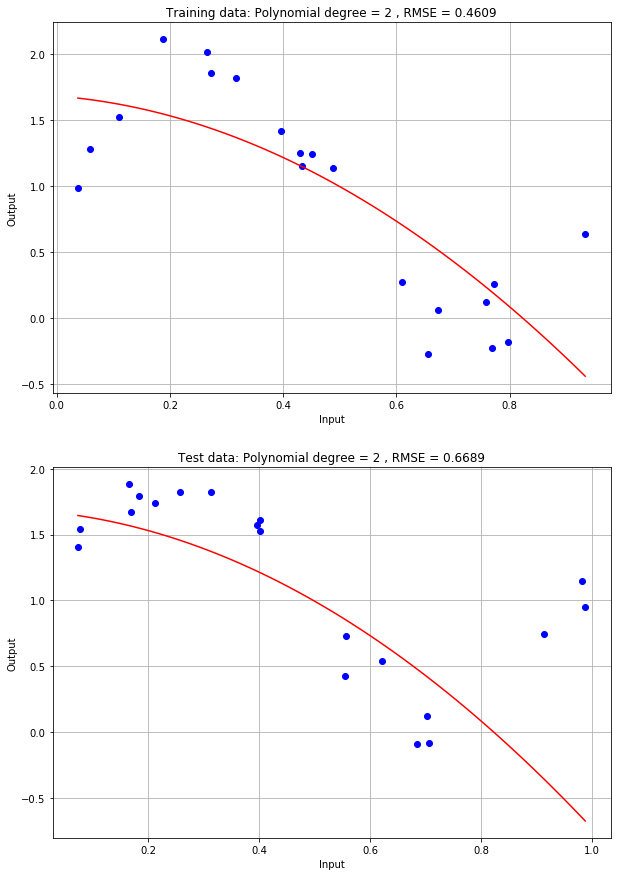

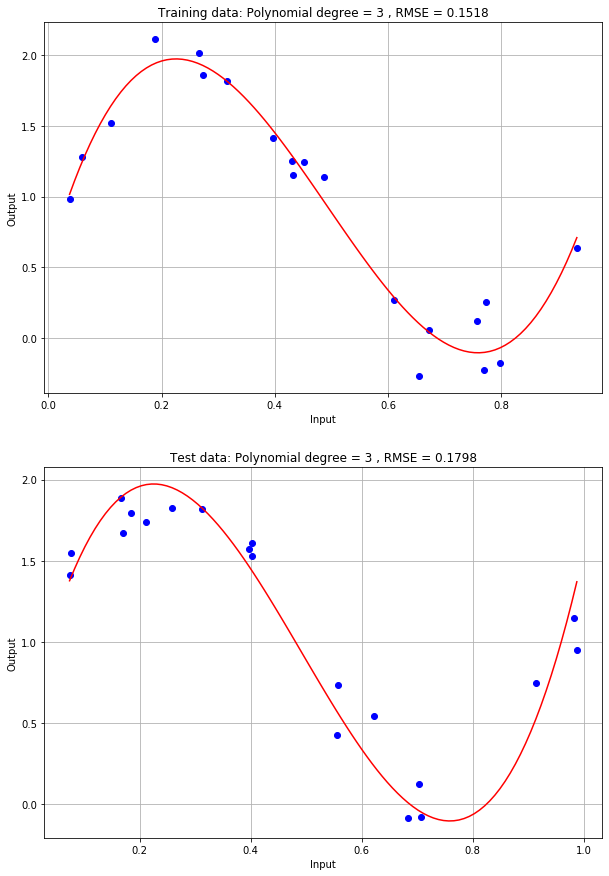

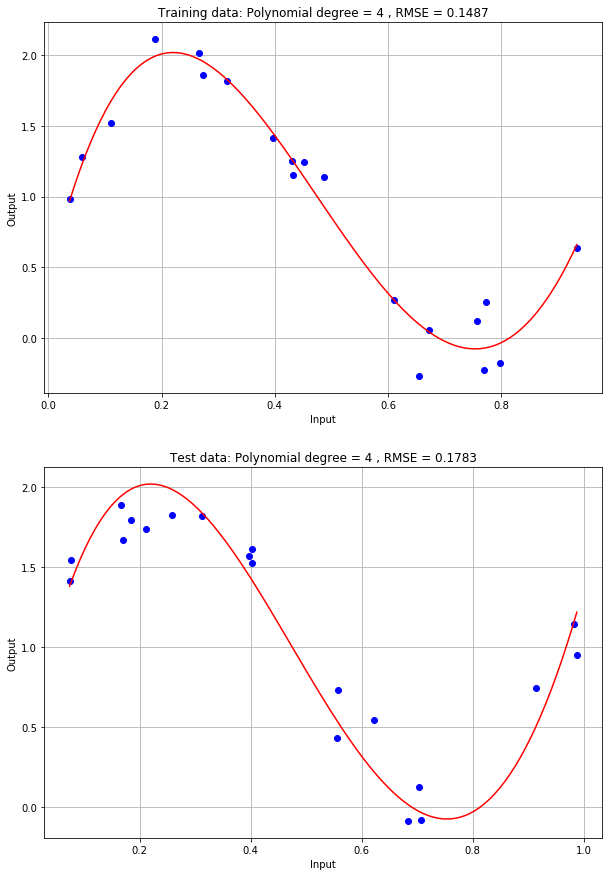

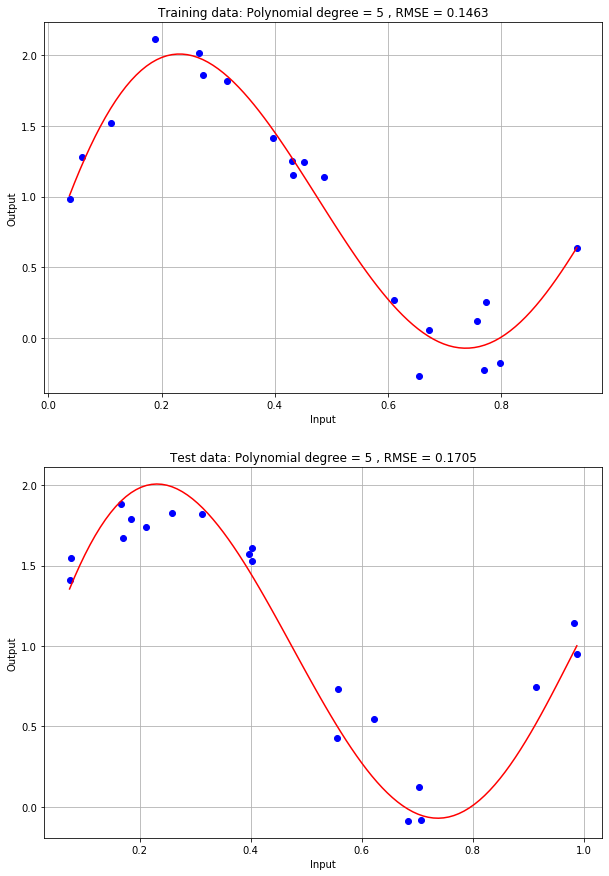

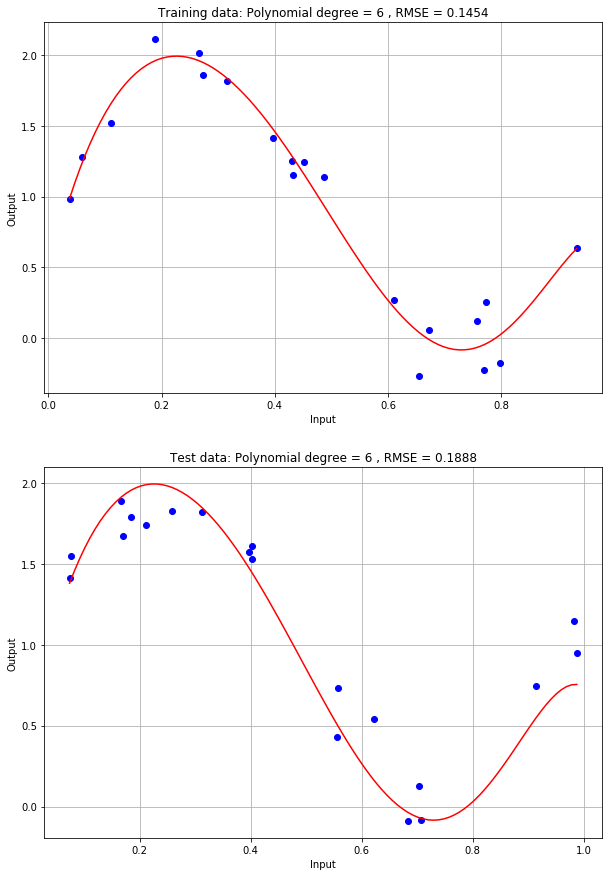

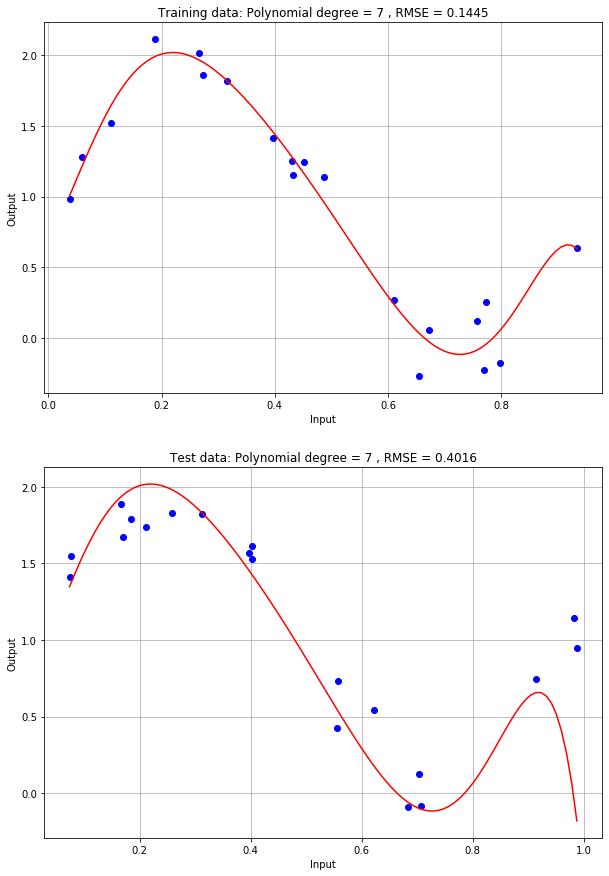

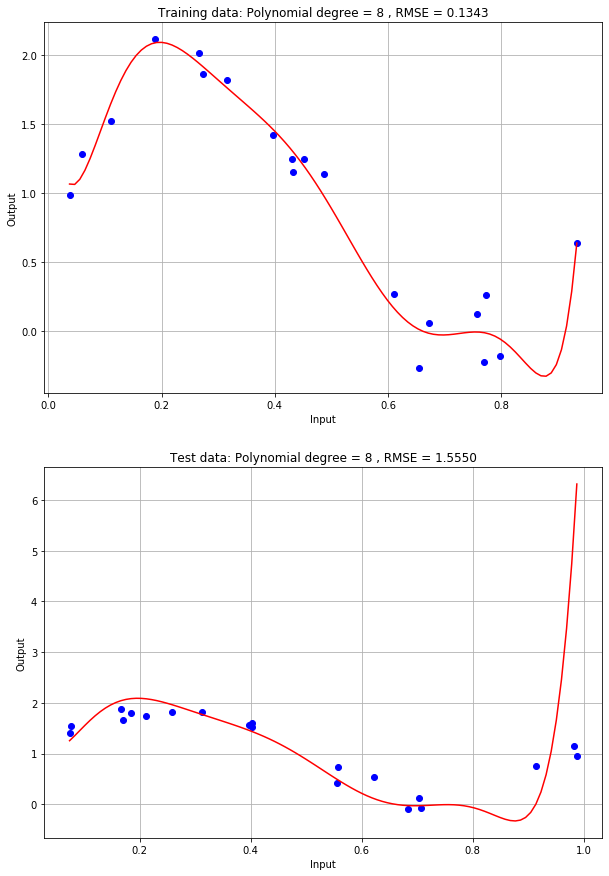

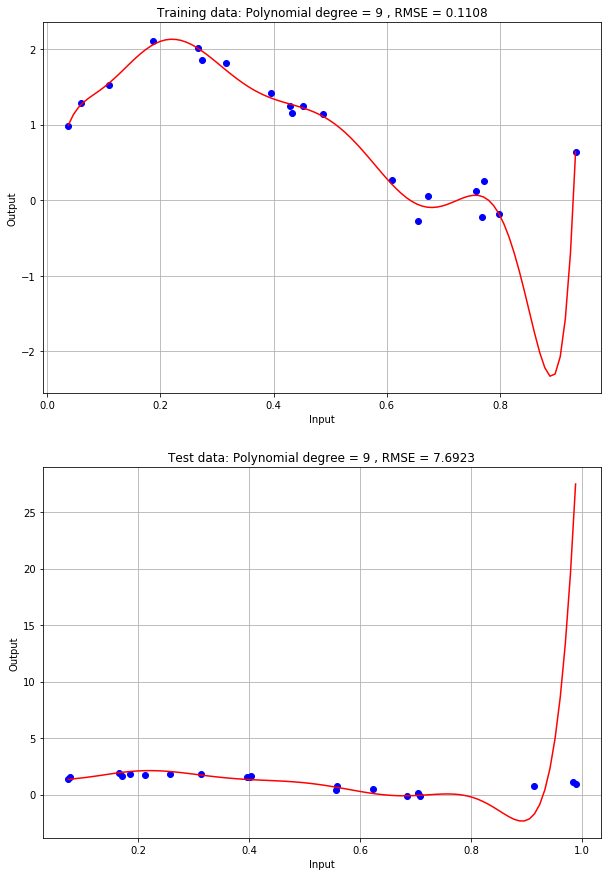

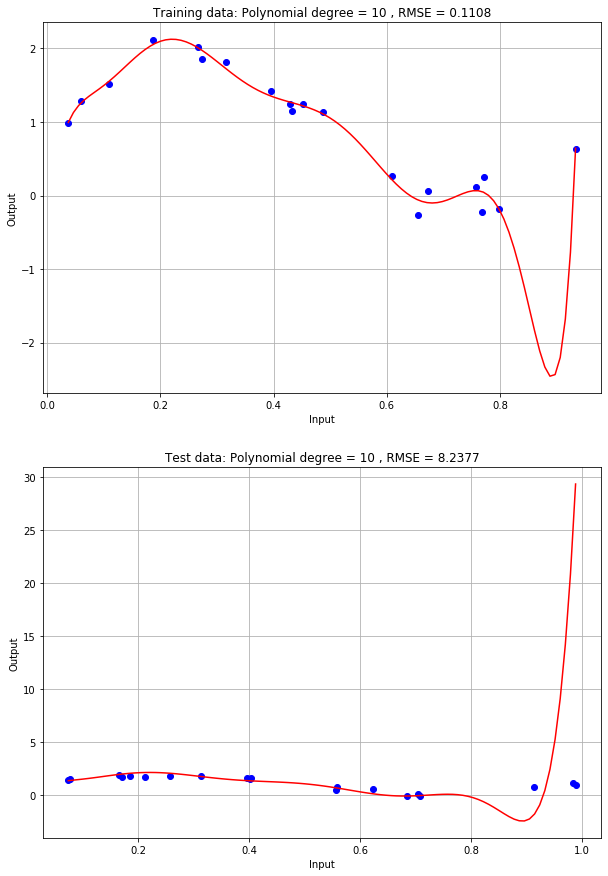

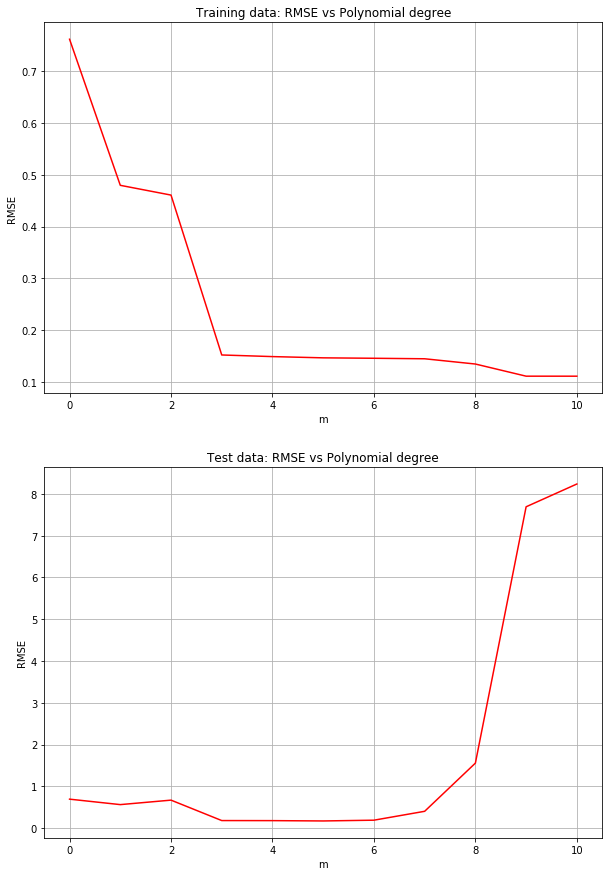

In [15]:
m_arr = np.arange(11)
rmsetrain_arr = np.zeros(11)
rmsetest_arr = np.zeros(11)
for m in m_arr:
    wopt, Jlosstrain, Jlosstest, rmsetrain, rmsetest = polynomial_regression(X_train,y_train,X_test,y_test,m)
    rmsetrain_arr[m] = rmsetrain
    rmsetest_arr[m] = rmsetest
    
plt.subplot(2,1,1)
plt.plot(m_arr,rmsetrain_arr,'r')
plt.xlabel('m')
plt.ylabel('RMSE')
plt.title('Training data: RMSE vs Polynomial degree')
plt.grid(b=True)
  
plt.subplot(2,1,2)
plt.plot(m_arr,rmsetest_arr,'r')
plt.xlabel('m')
plt.ylabel('RMSE')
plt.title('Test data: RMSE vs Polynomial degree')
plt.grid(b=True)
    
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()    

In [16]:
print(rmsetest_arr)

[0.69230549 0.56174879 0.66891796 0.17979852 0.17827462 0.1704839
 0.18883192 0.40155359 1.55496541 7.69227742 8.23765816]
